# Análisis del nacimiento de bebés en US

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as kde

In [159]:
births = pd.read_csv("../../data/us-births.csv")
moon=pd.read_csv("../../data/moon_illumination_1800-2100.csv")

In [160]:
pd.crosstab(index=[moon['phase'],],columns='phase')


col_0,phase
phase,
first quarter,11189
full,10736
last quarter,11196
new,10733
waning crescent,16426
waning gibbous,16421
waxing crescent,16437
waxing gibbous,16436


In [161]:
births.shape

(15547, 5)

In [162]:
births.head()
v=births[births['day']==99]
v.info()
births['day'][1:5]
n=4
#print(births.query("day==@n"))
print(births[births.day.isin([1,2])])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 62 to 14944
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    350 non-null    int64  
 1   month   350 non-null    int64  
 2   day     350 non-null    float64
 3   gender  350 non-null    object 
 4   births  350 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 16.4+ KB
       year  month  day gender  births
0      1969      1  1.0      F    4046
1      1969      1  1.0      M    4440
2      1969      1  2.0      F    4454
3      1969      1  2.0      M    4548
64     1969      2  1.0      F    4394
...     ...    ...  ...    ...     ...
14948  1988     11  2.0      M    5645
15005  1988     12  1.0      F    5492
15006  1988     12  1.0      M    5735
15007  1988     12  2.0      F    5255
15008  1988     12  2.0      M    5644

[960 rows x 5 columns]


In [163]:
births.tail()
births['day']=births['day'].fillna(1)
births.loc[births['day']>31,'day']=1


In [164]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15547 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [165]:
births.describe()
births['gender'].fillna('F')

0        F
1        M
2        F
3        M
4        F
        ..
15542    M
15543    F
15544    M
15545    F
15546    M
Name: gender, Length: 15547, dtype: object

In [166]:
births.corr()

,year,month,day,births
year,1.000000,-0.000117,-0.138081,0.525119
month,-0.000117,1.000000,0.007888,0.005101
day,-0.138081,0.007888,1.000000,-0.266243
births,0.525119,0.005101,-0.266243,1.000000


In [167]:
births.pivot_table('births', index = 'year', columns='gender', aggfunc='sum')

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
...,...,...
2004,2010710,2108197
2005,2022892,2122727
2006,2084957,2188268


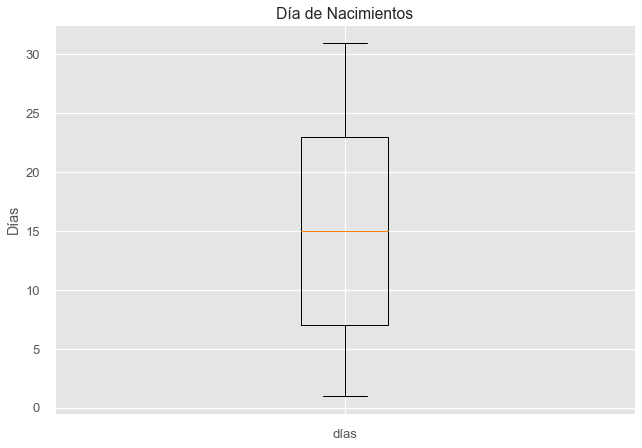

0        1.0
1        1.0
2        2.0
3        2.0
4        3.0
        ... 
15542    1.0
15543    1.0
15544    1.0
15545    1.0
15546    1.0
Name: day, Length: 15547, dtype: float64

In [168]:
fig,ax=plt.subplots()


ax.boxplot(births['day'],labels=['días'])
ax.set_ylabel('Días')

ax.set_title('Día de Nacimientos')
plt.show()
births['day']

In [169]:
births[births.year==1969].pivot_table('births',index='month',columns='day',aggfunc='sum')

day,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
month,,,,,,,,,,,,,,,,,,,,,
1,8550,9002,9542,8960,8390,9560,9738,9734,9434,10042,...,9884,9454,9798,9022,8568,9910,10032,9380,9674,9692
2,9220,8814,9988,9996,9676,9728,10102,9262,8694,9954,...,9152,8704,9966,10566,10048,9618,9756,66,52,44
3,9300,8580,10068,10264,10046,9704,9948,9334,8394,9892,...,8962,8602,9802,10272,9818,9698,10326,8908,8186,9592
4,10076,9978,9530,9572,8748,8008,9374,10176,9852,9708,...,10226,9868,9472,9646,8922,7966,9518,9700,9138,52
5,9312,9736,8768,8094,9930,9964,9626,9484,9362,8516,...,9406,9584,8558,8226,9840,10352,9938,10190,9154,8640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,10842,9982,9082,10450,10944,10852,10382,11302,10092,9106,...,10586,9660,9084,10586,11082,10638,10616,10714,9708,8986
9,9120,10686,11044,10506,10610,9710,9196,10508,10598,10450,...,10970,11300,10898,10840,11154,10170,9198,10708,11138,68
10,11006,10656,10922,9710,8972,10318,10654,10510,10710,10748,...,10300,9814,10010,9258,8864,10372,10640,10104,10110,10144


In [170]:
births['decade'] = (births['year']//10)*10 #sacando decadas el cociente de 10 multiplicado por 10

In [171]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [172]:
#table de frecuencia aunque no aplica correctamente a births en este caso 

pd.crosstab(index=[births['decade'],births['gender']],columns='births')

col_0          births
decade gender        
1960   F          384
       M          384
1970   F         3811
       M         3807
1980   F         3353
       M         3352
1990   F          120
       M          120
2000   F          108
       M          108

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


<Figure size 1080x576 with 0 Axes>

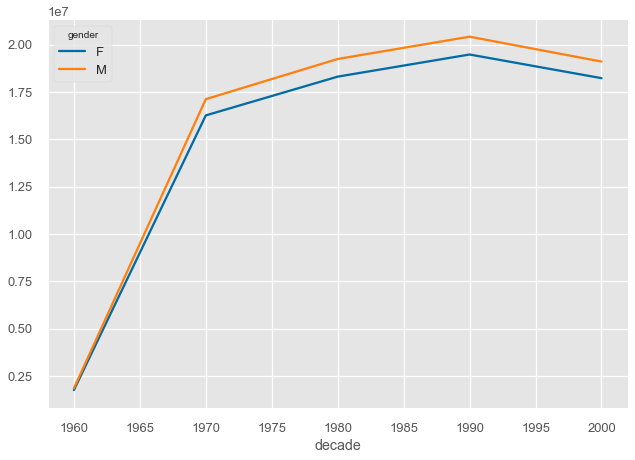

In [173]:
plt.figure(figsize=(15, 8))
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum').plot()
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

In [174]:
%matplotlib inline

In [175]:
import seaborn as sb

In [176]:
sb.set()

<Figure size 1080x576 with 0 Axes>

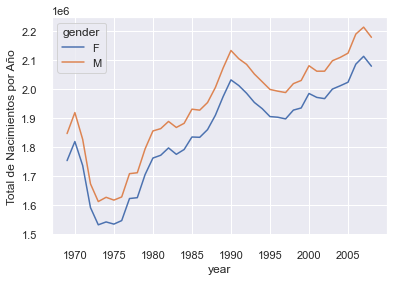

In [177]:
plt.figure(figsize=(15, 8))
births.pivot_table('births', index='year', columns='gender', aggfunc="sum").plot()
plt.ylabel("Total de Nacimientos por Año")
plt.show()

In [178]:
quartiles = np.percentile(births['births'], [25,50,75])
quartiles

array([4358. , 4814. , 5289.5])

In [179]:
med = quartiles[1]
IQR = quartiles[2]-quartiles[0]#rango intercuartilico
sig = 0.75*IQR

In [180]:
births = births.query("(births > @med - 5*@sig) & (births < @med + 5*@sig)")
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


C:\Users\daniel\AppData\Local\Temp\ipykernel_18228\4177740309.py:7: FutureWarning: ['gender'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  anio1980.agg(['mean','min','max','std'])


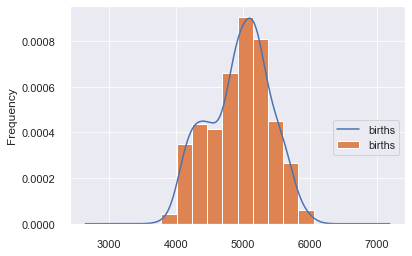

In [181]:

fig,ax=plt.subplots()
anio1980=births[births['year']==1980]

anio1980['births'].plot.kde(ax=ax)#Generate Kernel Density Estimate plot using Gaussian kernels
anio1980['births'].plot.hist( density=True,ax=ax)
#ax.hist(anio1980['births'], density=True,ax=ax)
anio1980.agg(['mean','min','max','std'])
ax.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax.grid(alpha=0.8)



<AxesSubplot:xlabel='births'>

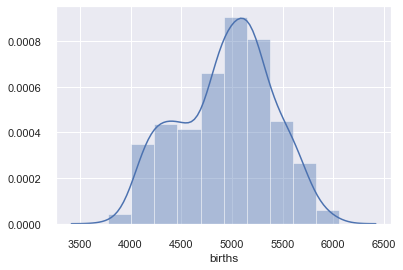

In [186]:
#usando seaborn
import seaborn as sb

sb.distplot(anio1980['births'],bins=10)

In [ ]:
births['day'] = births['day'].astype(int)

In [ ]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [ ]:
births.index = pd.to_datetime(10000*births.year+100*births.month+births.day, format="%Y%m%d")

In [ ]:
births.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


In [ ]:
births['dayofweek'] = births.index.dayofweek

In [ ]:

#births.index.name='fechaN' 
births.head()


,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [ ]:
from datetime import datetime, timedelta
moon.head(20)

moon['fecha']=moon['date'].apply(lambda x: x.split(' ')[0]) 


moon['fecha'].astype('datetime64')
moon.set_index('fecha',inplace=True)
moon=moon.drop(['Unnamed: 0','date'], axis=1)
moon.index


Index(['1800-01-01', '1800-01-02', '1800-01-03', '1800-01-04', '1800-01-05',
       '1800-01-06', '1800-01-07', '1800-01-08', '1800-01-09', '1800-01-10',
       ...
       '2099-12-23', '2099-12-24', '2099-12-25', '2099-12-26', '2099-12-27',
       '2099-12-28', '2099-12-29', '2099-12-30', '2099-12-31', '2100-01-01'],
      dtype='object', name='fecha', length=109574)

In [ ]:
births.index

DatetimeIndex(['1969-01-01', '1969-01-01', '1969-01-02', '1969-01-02',
               '1969-01-03', '1969-01-03', '1969-01-04', '1969-01-04',
               '1969-01-05', '1969-01-05',
               ...
               '1988-12-27', '1988-12-27', '1988-12-28', '1988-12-28',
               '1988-12-29', '1988-12-29', '1988-12-30', '1988-12-30',
               '1988-12-31', '1988-12-31'],
              dtype='datetime64[ns]', length=14610, freq=None)

In [ ]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc="mean")

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


C:\Users\daniel\AppData\Local\Temp\ipykernel_18228\2561079010.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['', "Lun", "Mar", "Mie", "Jue", "Vie", "Sab", "Dom"])


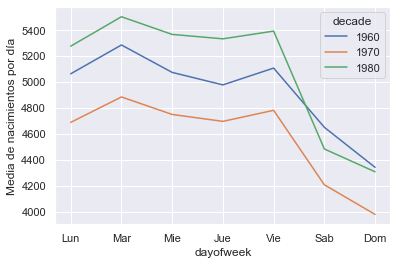

In [ ]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc="mean").plot()
plt.gca().set_xticklabels(['', "Lun", "Mar", "Mie", "Jue", "Vie", "Sab", "Dom"])
plt.ylabel("Media de nacimientos por día")
plt.show()

In [ ]:
births_by_date = births.pivot_table('births', index=[births.index.month, births.index.day], aggfunc="mean")

In [ ]:
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [ ]:
births_by_date.index = [pd.datetime(2020, month, day) 
                        for (month, day) in births_by_date.index]

C:\Users\daniel\AppData\Local\Temp\ipykernel_18228\3866488121.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2020, month, day)


In [ ]:
births_by_date.head()

,births
2020-01-01,4009.225
2020-01-02,4247.400
2020-01-03,4500.900
2020-01-04,4571.350
2020-01-05,4603.625


<Figure size 864x288 with 0 Axes>

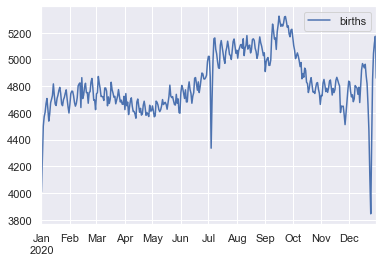

In [ ]:
plt.figure(figsize=(12,4))
births_by_date.plot()
plt.show()

In [ ]:

births.index.name="fechaNac"
births.head()
births.reset_index(inplace=True)
moon.reset_index(inplace=True)
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14610 entries, 0 to 14609
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fechaNac   14610 non-null  datetime64[ns]
 1   year       14610 non-null  int64         
 2   month      14610 non-null  int64         
 3   day        14610 non-null  int32         
 4   gender     14610 non-null  object        
 5   births     14610 non-null  int64         
 6   decade     14610 non-null  int64         
 7   dayofweek  14610 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(5), object(1)
memory usage: 856.2+ KB


In [ ]:
moon["fecha"]=moon["fecha"].astype("datetime64")
moon.info()
moon.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109574 entries, 0 to 109573
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   fecha      109574 non-null  datetime64[ns]
 1   illum_pct  109574 non-null  float64       
 2   phase      109574 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.5+ MB


(109574, 3)

In [ ]:
births.shape

(14610, 8)

In [ ]:
tbm=births.merge(moon,left_on="fechaNac", right_on="fecha", how="left" )
tbm.shape

(14610, 11)

In [ ]:
data=tbm.groupby(["phase"])["births"].agg("sum")

In [ ]:

data=pd.DataFrame(data)
data.reset_index(inplace=True)

data

,phase,births
0,first quarter,7191381
1,full,6896777
2,last quarter,7253168
3,new,6821509
4,waning crescent,10628176
5,waning gibbous,10545923
6,waxing crescent,10644753
7,waxing gibbous,10503821


In [ ]:
data[data["phase"]=="first quarter"]

,phase,births
0,first quarter,7191381


In [ ]:
data.iloc[0,1]
data.shape[0]

for i in range(data.shape[0]):
    print(data.iloc[i,1])

7191381
6896777
7253168
6821509
10628176
10545923
10644753
10503821


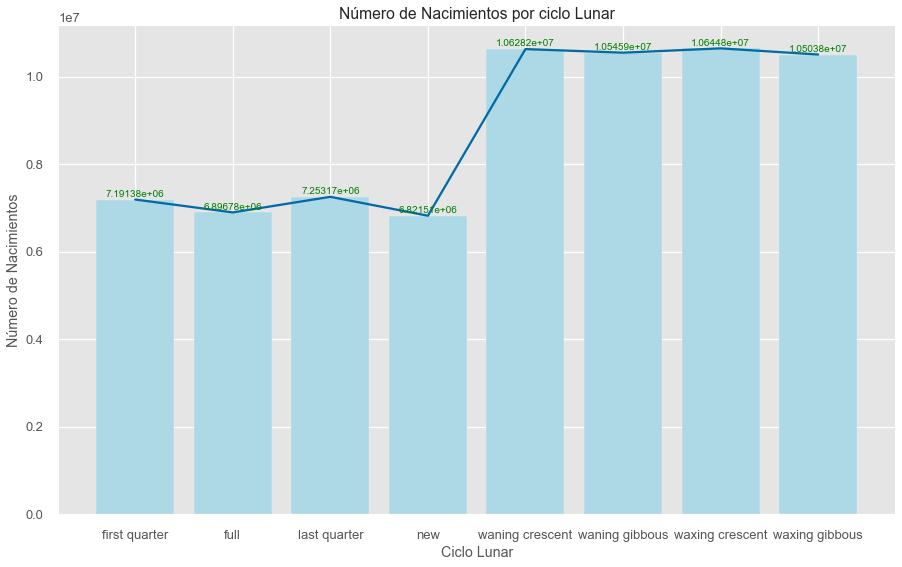

In [ ]:
from tkinter.ttk import Label


fig,ax=plt.subplots(figsize=(15,9))
	
#ax.bar(data["phase"],data["births"])
ax.plot(data["phase"],data["births"])
ax.set_xlabel("Ciclo Lunar")
ax.set_ylabel("Número de Nacimientos")
ax.set_title("Número de Nacimientos por ciclo Lunar")
plt.style.use("seaborn-talk")
plt.style.available

for i in range(data.shape[0]):
    eti=ax.bar(i,data.iloc[i,1],color="lightblue")
    ax.bar_label(eti,padding=1,color="green")
    ax.set
